In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [8]:
file_loc1 = "../ADNI_data/"
df_DX = pd.read_csv(file_loc1 + 'DXSUM_PDXCONV_ADNIALL_Diagnostic Summary_standardised.csv')
df_REGISTRY=pd.read_csv(file_loc1 + 'REGISTRY_18Aug2023.csv')
df_DX_EDU_APOE=pd.read_csv(file_loc1 +'Subjects_Final_with_relevantfeatures_with_details_2.csv')
df_DX_EDU_APOE_mri=pd.read_csv('df_DX_EDU_APOE_mri_all_final6.csv')

df_Dementia_major_regions = pd.read_csv(file_loc1 +'AD_Dementia_major_regions.csv')

In [5]:
df_DX_EDU_APOE.shape,df_DX_EDU_APOE.RID.nunique()

((24070, 23), 2556)

In [6]:
df_DX_EDU_APOE.count()

Phase                 24070
RID                   24070
VISCODE2              23774
USERDATE              24070
PTDOBMM               24070
PTDOBYY               24070
PTGENDER              24070
GENDER                24070
DOB_mm_yy             24070
USERDATE_tf           24070
DOB_indays            24070
age_inyears           24070
DX_EXAMDATE           12435
DIAGNOSIS_all         12458
DX                    12458
PTEDUCAT              24070
APGEN1                24070
APGEN2                24070
psycond               24070
psycond_digital       24070
edu_status            24070
edu_status_digital    24070
APOE_status           24070
dtype: int64

In [12]:
df_DX_EDU_APOE_mri.shape,df_DX_EDU_APOE_mri.RID.nunique()

((6277, 29), 1588)

In [13]:
df_DX_EDU_APOE_mri.count()

Phase          6277
RID            6277
VISCODE2       6277
USERDATE       6277
GENDER         6277
age_inyears    6277
DX_EXAMDATE    4552
DX             4556
psycond        6277
edu_status     6277
APOE_status    6277
EXAMDATE       6277
IMAGEUID       6277
STATUS         6277
OVERALLQC      6173
ST83CV         6277
ST119CV        6277
ST103CV        6277
ST91CV         6277
ST99CV         6277
ST85CV         6277
ST90CV         6277
ST93CV         6277
ST72CV         6277
ST111CV        6277
ST88SV         6277
ST71SV         6277
ST70SV         6277
sum_regions    6277
dtype: int64

In [26]:
df_DX_EDU_APOE_mri.RID.value_counts()[:-303]

2234    13
4271    12
1261    12
413     12
2245    12
        ..
6356     2
473      2
6821     2
6817     1
6889     1
Name: RID, Length: 1285, dtype: int64

In [29]:
df_DX_EDU_APOE_mri[df_DX_EDU_APOE_mri['RID']==2234].T

,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232
Phase,ADNIGO,ADNIGO,ADNIGO,ADNI2,ADNI2,ADNI2,ADNI2,ADNI2,ADNI2,ADNI2,ADNI3,ADNI3,ADNI3
RID,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234
VISCODE2,scmri,m03,m06,m12,m24,m24,m36,m48,m60,m72,m84,m96,m108
USERDATE,2010-12-08,2011-03-11,2011-06-20,2012-01-05,2012-12-06,2012-12-06,2014-01-30,2014-12-09,2016-03-31,2016-12-12,2018-06-15,2019-08-29,2020-01-17
GENDER,female,female,female,female,female,female,female,female,female,female,female,female,female
age_inyears,63.6879,63.9425,64.219,64.7639,65.6838,65.6838,66.8337,67.6906,68.9993,69.7002,71.206,72.4107,72.7967
DX_EXAMDATE,NaN,NaN,10/19/2011,2/29/2012,3/8/2013,3/8/2013,3/21/2014,1/23/2015,7/5/2016,1/24/2017,4/3/2018,3/19/2019,9/29/2020
DX,NaN,NaN,MCI,MCI to NL,NL,NL,NL,NL,NL,NL,NL,NL,NL
psycond,depress,depress,depress,depress,depress,depress,depress,depress,depress,depress,depress,depress,depress
edu_status,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu,lowedu


<AxesSubplot:>

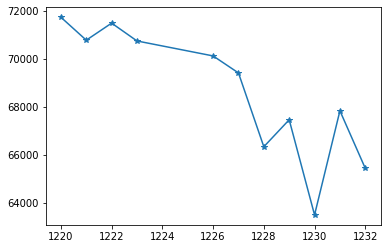

In [34]:
df_DX_EDU_APOE_mri[(df_DX_EDU_APOE_mri['RID']==2234)&(df_DX_EDU_APOE_mri['OVERALLQC']=='Pass')].sum_regions.plot(marker='*')